<a href="https://colab.research.google.com/github/IsabelDing00/ML/blob/master/Neural_network1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [0]:
#tf.keras.datasets.cifar10.load_data()
#this is a different way to load the data
#I copy this from Keras web
#compare to the sklearn's loading data
# https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html
fashion_mnist = tf.keras.datasets.fashion_mnist 
(train_data, train_targets), (test_data, test_targets) = fashion_mnist.load_data() #load data

In [18]:
train_data.shape
# 60000 pictures, 28*28 

(60000, 28, 28)

In [5]:
train_data.dtype

dtype('uint8')

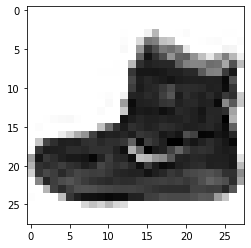

In [19]:
import matplotlib.pyplot as plt
# you can use Matplotlib's imshow() function with 'binary'(-> black and white)
# color map, without 'binary', it will be a color picture.
plt.imshow(train_data[0], cmap='binary')

In [0]:
# ??? why Data normalization, some do, some not.
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(train_data, train_targets, test_size = 0.3)
#I can change the test_size to 0.01 coz i have a lot of data.

In [21]:
train_targets

array([4, 5, 0, ..., 9, 1, 6], dtype=uint8)

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[train_targets[0]]

'Coat'

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
classifier = Sequential()
classifier.add(Flatten(input_shape=[28, 28]))
classifier.add(Dense(25, activation="relu")) 
classifier.add(Dense(10, activation="relu"))
classifier.add(Dense(10, activation="softmax")) 
classifier.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#sparse labels[0, 2, 1, 9]:'sparse_categorical_crossentropy'
#one hot labels[0,0,1,0][1,0,0,0,]:'categorical_corssentropy'
#activation->'sigmoid'; loss'binary_loss'
#input_dim -> 

In [24]:
classifier.layers
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 19,995
Trainable params: 19,995
Non-trainable params: 0
_________________________________________________________________


In [0]:
#classifier.fit(train_data, train_targets, epochs=100)


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 2s 52us/step - loss: 1.1749 - accuracy: 0.5913 - val_loss: 0.7586 - val_accuracy: 0.7248
Epoch 2/20
33600/33600 [==============================] - 2s 49us/step - loss: 0.6724 - accuracy: 0.7596 - val_loss: 0.6440 - val_accuracy: 0.7570
Epoch 3/20
33600/33600 [==============================] - 2s 48us/step - loss: 0.5860 - accuracy: 0.7961 - val_loss: 0.5780 - val_accuracy: 0.7861
Epoch 4/20
33600/33600 [==============================] - 2s 47us/step - loss: 0.5431 - accuracy: 0.8104 - val_loss: 0.5515 - val_accuracy: 0.8020
Epoch 5/20
33600/33600 [==============================] - 2s 47us/step - loss: 0.5157 - accuracy: 0.8188 - val_loss: 0.5139 - val_accuracy: 0.8115
Epoch 6/20
33600/33600 [==============================] - 2s 47us/step - loss: 0.4931 - accuracy: 0.8261 - val_loss: 0.5004 - val_accuracy: 0.8188
Epoch 7/20
33600/33600 [==============================] - 2s 48us/ste

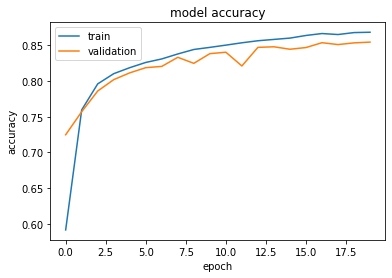

In [26]:
history = classifier.fit(train_data, train_targets, validation_split = 0.2, epochs = 20)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

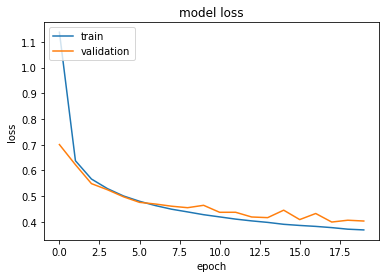

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
predictions = classifier.predict_classes(test_data)
accuracy = accuracy_score(test_targets, predictions)
accuracy

0.8562777777777778